# Comparing processing data to original

It appears that some processed models are missing some data see [here](/home/links/ct715/eddy_feedback/chapter1/resolution/original_res_components.ipynb). 

Here I will start by comparing the model I was using (HadGEM3-GC31-MM), and rerun the processing to see where the issue is.

I'll then extend this to other models that have an issue.

In [13]:
import xarray as xr
import functions.eddy_feedback as ef

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

### Processed data

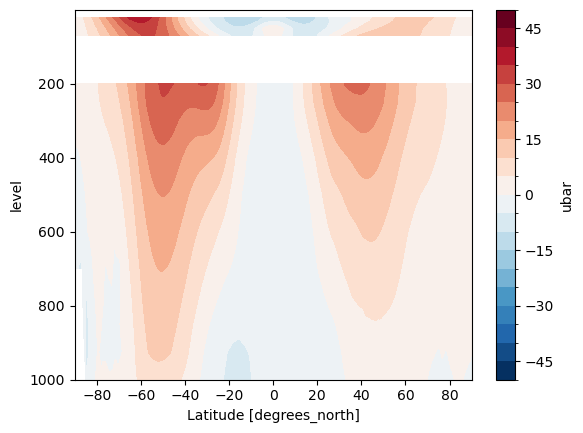

In [9]:
ds = xr.open_mfdataset('/home/links/ct715/data_storage/PAMIP/processed_monthly/HadGEM3-GC31-MM*.nc')
ds.ubar.mean(('time', 'ens_ax')).plot.contourf(levels=20, yincrease=False)

### Original data

In [24]:
og_ua = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/ua/HadGEM3-GC31-MM/*.nc',
    combine='nested',
    concat_dim='ens_ax',
    parallel=True,
    chunks={'time': 31}
)
og_ua.plev.values

array([100000.,  92500.,  85000.,  70000.,  60000.,  50000.,  40000.,
        30000.,  25000.,  20000.,  15000.,  10000.,   7000.,   5000.,
         3000.,   2000.,   1000.,    500.,    100.])

In [25]:
og_epfy = xr.open_mfdataset(
    '/home/links/ct715/data_storage/PAMIP/monthly/1.1_pdSST-pdSIC/epfy/HadGEM3-GC31-MM/*.nc',
    combine='nested',
    concat_dim='ens_ax',
    parallel=True,
    chunks={'time': 31}
)
og_epfy.plev.values

array([1.00000000e+05, 9.25000000e+04, 8.50000000e+04, 7.00000000e+04,
       6.00000000e+04, 5.00000000e+04, 4.00000000e+04, 3.00000000e+04,
       2.50000000e+04, 2.00000000e+04, 1.70000000e+04, 1.50000000e+04,
       1.30000000e+04, 1.15000000e+04, 1.00000000e+04, 9.00000000e+03,
       8.00000000e+03, 7.00000000e+03, 5.00000000e+03, 3.00000000e+03,
       2.00000000e+03, 1.50000000e+03, 1.00000000e+03, 7.00000000e+02,
       5.00000000e+02, 3.00000000e+02, 2.00000000e+02, 1.50000000e+02,
       1.00000000e+02, 6.99999988e+01, 5.00000000e+01, 4.00000006e+01,
       3.00000012e+01, 2.00000003e+01, 1.50000006e+01, 1.00000001e+01,
       7.00000003e+00, 5.00000007e+00, 2.99999993e+00])

In [ ]:
og_epfy['plev'] = og_epfy.sel(plev=og_ua.ua.values)
og_epfy

In [ ]:
# og_ua.ua.mean(('time', 'lon', 'ens_ax')).plot.contourf(levels=20, yincrease=False)

### Reprocess the data

In [ ]:
og_ua['lat']
ds = xr.Dataset({
    'ubar': og_ua.ua.mean('lon'),
    'epfy': og_epfy.epfy
})
ds = ds.sel(time=slice('2000-06', '2001-05'))
ds

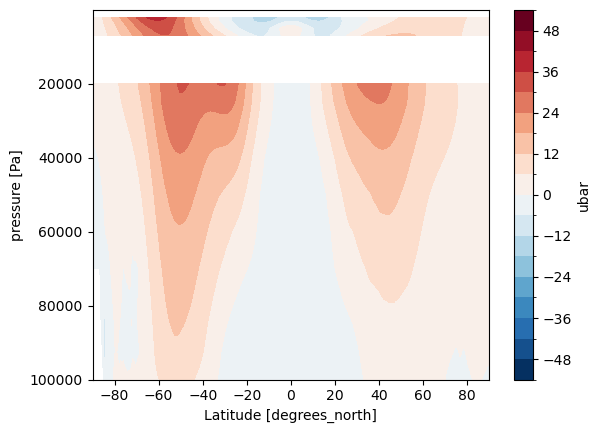

In [16]:
ds.ubar.mean(('time', 'ens_ax')).plot.contourf(levels=20, yincrease=False)

In [18]:
new_ds = ef.calculate_divFphi(ds)
new_ds

<xarray.Dataset>
Dimensions:  (time: 14, level: 39, lat: 325, ens_ax: 300)
Coordinates:
  * time     (time) object 2000-04-16 00:00:00 ... 2001-05-16 00:00:00
  * level    (level) float64 0.03 0.05 0.07 0.1 0.15 ... 700.0 850.0 925.0 1e+03
  * lat      (lat) float64 -90.0 -89.44 -88.89 -88.33 ... 88.33 88.89 89.44 90.0
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 14, 39, 325), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 14, 39, 325), meta=np.ndarray>
    divFy    (ens_ax, time, level, lat) float64 9.156e+21 ... -1.01e+22

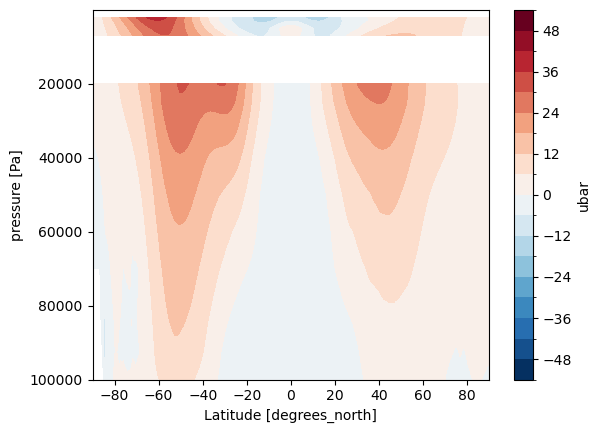

In [15]:
new_ds.ubar.mean(('time', 'ens_ax')).plot.contourf(levels=20, yincrease=False)